# Evaluation results

- For the explanation of metrics see Teams - Evaluation - Metriken

In [100]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

folder_path = "../../eval_results/"
overall_result_model_paths = ["ChatGPT/master-labeling/prompt4", "ChatGPT/master-labeling/prompt6", "T5-final", "llama-7-master", "vit-gpt2/224x224-vit-gpt-2-goldstandard-v2-only", "baseline"]
overall_result_model_names = ["ChatGPT prompt 4", "ChatGPT prompt 6", "T5", "LLaMa", "VitGPT2", "Baseline"]

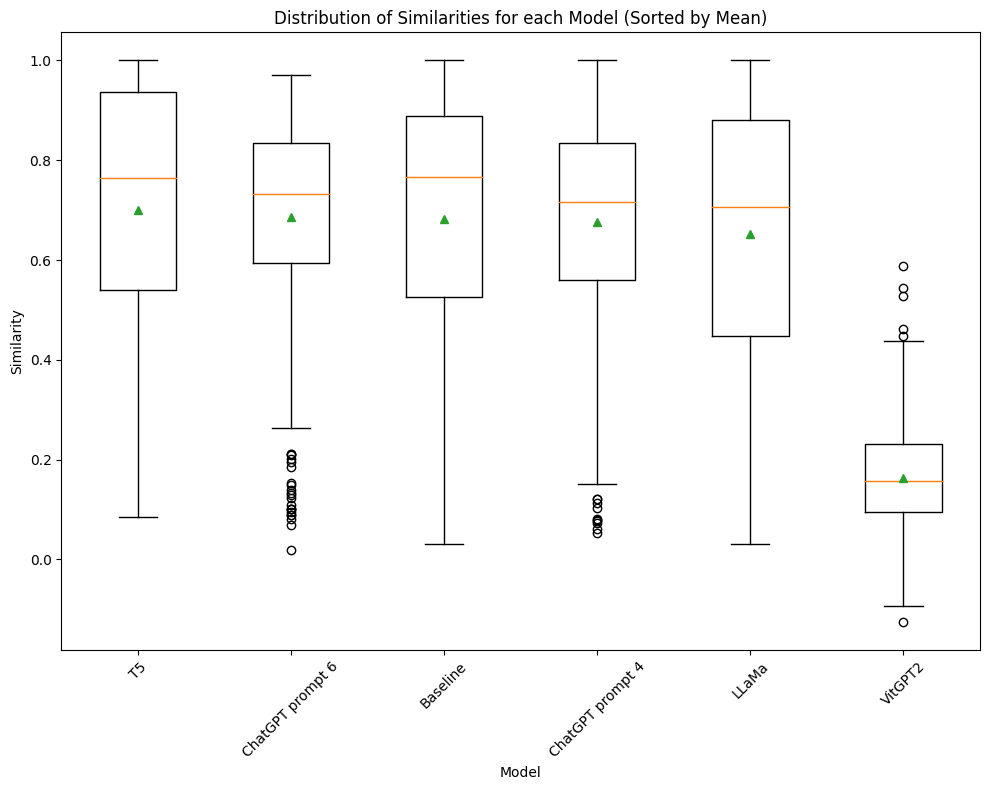

In [107]:
similarities = []

for dir in overall_result_model_paths:
        subfolder_path = os.path.join(folder_path, dir)
        csv_path = os.path.join(subfolder_path, "cosine_sim.csv")

        if os.path.exists(csv_path):
            df = pd.read_csv(csv_path)
            try:
                similarities.append(df['max_similarity'])
            except:
                similarities.append(df['similiarities'])

mean_similarities = [np.mean(data) for data in similarities]

# Sort the data and mean similarities in descending order
sort_indices = np.argsort(mean_similarities)[::-1]
sorted_similarity_data = [similarities[i] for i in sort_indices]
sorted_model_names = [overall_result_model_names[i] for i in sort_indices]
sorted_mean_similarities = [mean_similarities[i] for i in sort_indices]

# Plotting the bar chart
plt.figure(figsize=(10,8))
plt.boxplot(sorted_similarity_data, labels=sorted_model_names, showmeans=True)
plt.xlabel("Model")
plt.ylabel("Similarity")
plt.title("Distribution of Similarities for each Model (Sorted by Mean)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plots/overall_cosine_sim.png", dpi=150)
plt.show()

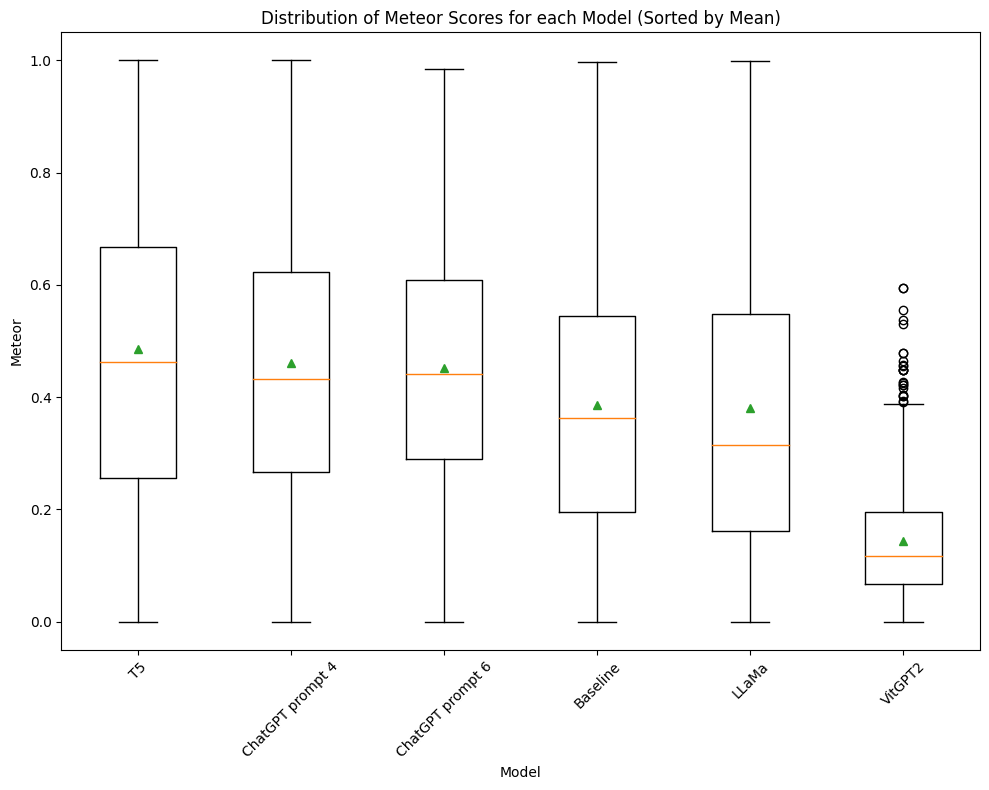

In [102]:
meteors = []

for dir in overall_result_model_paths:
        subfolder_path = os.path.join(folder_path, dir)
        csv_path = os.path.join(subfolder_path, "sem_meteor.csv")

        if os.path.exists(csv_path):
            df = pd.read_csv(csv_path)
            try:
                meteors.append(df['max_sem_meteor'])
            except:
                meteors.append(df['sem_meteor'])

mean_meteors = [np.mean(data) for data in meteors]
sort_indices = np.argsort(mean_meteors)[::-1]
sorted_model_names = [overall_result_model_names[i] for i in sort_indices]
sorted_meteors = [meteors[i] for i in sort_indices]

plt.figure(figsize=(10,8))
plt.boxplot(sorted_meteors, labels=sorted_model_names, showmeans=True)
plt.xlabel("Model")
plt.ylabel("Meteor")
plt.title("Distribution of Meteor Scores for each Model (Sorted by Mean)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plots/overall_meteor_sim.png", dpi=150)
plt.show()

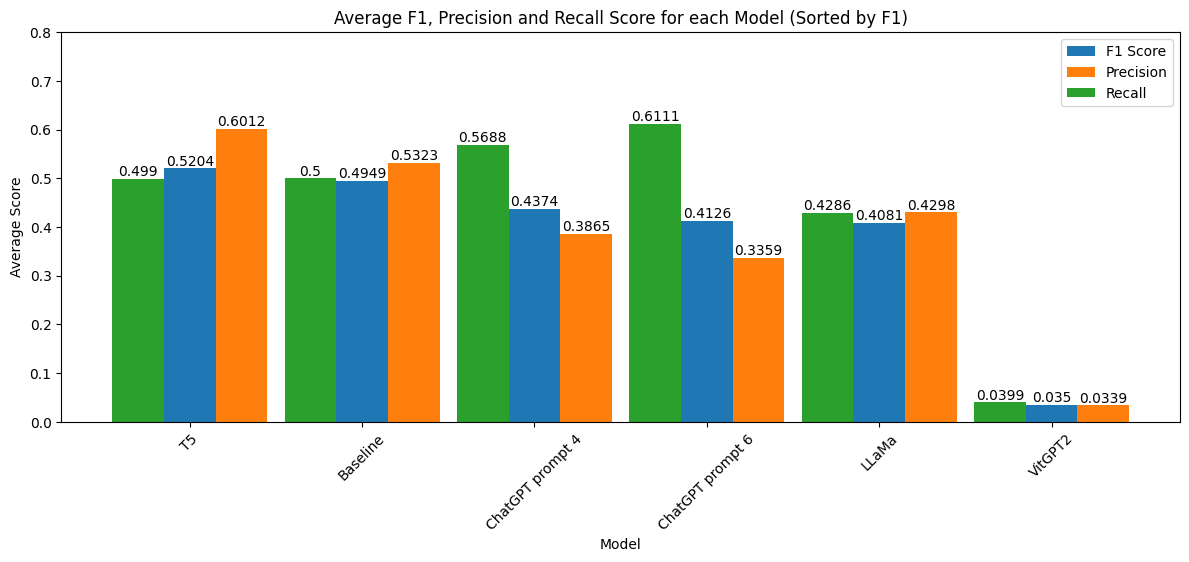

In [103]:
model_names = []
average_similarities = []
avg_ps = []
avg_rs = []

for dir in overall_result_model_paths:
        subfolder_path = os.path.join(folder_path, dir)
        csv_path = os.path.join(subfolder_path, "traditional_scores.csv")

        if os.path.exists(csv_path):
            df = pd.read_csv(csv_path)
            try:
                average_similarity = df['max_f1'].mean()
                avg_p = df['max_p'].mean()
                avg_r = df['max_r'].mean()
                average_similarities.append(average_similarity)
                avg_ps.append(avg_p)
                avg_rs.append(avg_r)
            except:
                average_similarity = df['f1'].mean()
                avg_p = df['p'].mean()
                avg_r = df['r'].mean()
                average_similarities.append(average_similarity)
                avg_ps.append(avg_p)
                avg_rs.append(avg_r)

sort_indices = np.argsort(average_similarities)[::-1]
sorted_model_names = [overall_result_model_names[i] for i in sort_indices]
sorted_average_similarities = [average_similarities[i] for i in sort_indices]
sorted_average_p = [avg_ps[i] for i in sort_indices]
sorted_average_r = [avg_rs[i] for i in sort_indices]

bar_width = 0.3
index = np.arange(len(sorted_model_names))

# Plotting the bar chart
plt.figure(figsize=(12,6))
plt.bar(index, sorted_average_similarities, bar_width, label="F1 Score")
plt.bar(index + bar_width, sorted_average_p, bar_width, label="Precision")
plt.bar(index - bar_width, sorted_average_r, bar_width, label="Recall")
plt.xlabel("Model")
plt.ylabel("Average Score")
plt.title("Average F1, Precision and Recall Score for each Model (Sorted by F1)")
plt.xticks(index, sorted_model_names, rotation=90)
# Add numerical values to each bar
for i, v in enumerate(sorted_average_similarities):
    plt.text(i, v, str(round(v, 4)), ha="center", va="bottom")

for i, v in enumerate(sorted_average_p):
    plt.text(i + bar_width, v, str(round(v, 4)), ha="center", va="bottom")

for i, v in enumerate(sorted_average_r):
    plt.text(i - bar_width, v, str(round(v, 4)), ha="center", va="bottom")

plt.ylim(0, 0.8)

plt.tight_layout()
plt.legend()
plt.xticks(rotation=45)
plt.savefig("plots/overall_traditional_scores_f1_barplot.png", dpi=150)
plt.show()

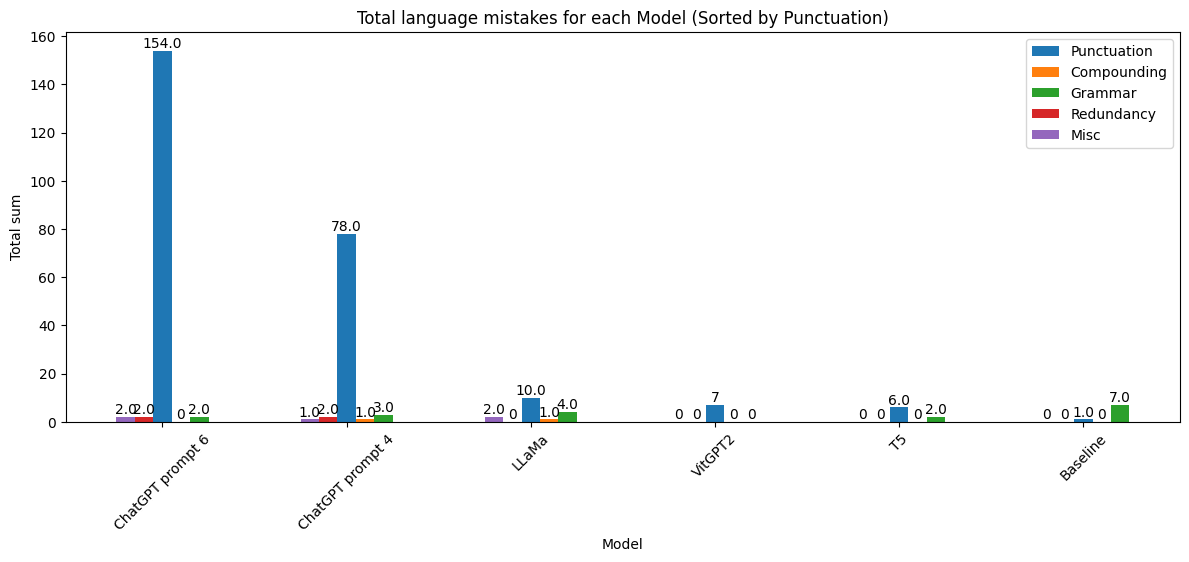

In [104]:
model_names = []
sum_punctuation = []
sum_compounding = []
sum_grammar = []
sum_redundancy = []
sum_misc = []


for dir in overall_result_model_paths:
        subfolder_path = os.path.join(folder_path, dir)
        csv_path = os.path.join(subfolder_path, "lt_errors.csv")

        if os.path.exists(csv_path):
            df = pd.read_csv(csv_path)
            try:
                punctuation = df['PUNCTUATION'].sum()
                sum_punctuation.append(punctuation)
            except:
                sum_punctuation.append(0)
            try:
                compounding =  df['COMPOUNDING'].sum()
                sum_compounding.append(compounding)
            except:
                sum_compounding.append(0)
            try:
                grammar =  df['GRAMMAR'].sum()
                sum_grammar.append(grammar)
            except:
                sum_grammar.append(0)
            try:
                redundancy =  df['REDUNDANCY'].sum()
                sum_redundancy.append(redundancy)
            except:
                sum_redundancy.append(0)
            try:
                misc =  df['MISC'].sum()
                sum_misc.append(misc)
            except:
                sum_misc.append(0)

sort_indices = np.argsort(sum_punctuation)[::-1]
sorted_model_names = [overall_result_model_names[i] for i in sort_indices]
sorted_sum_punctuation = [sum_punctuation[i] for i in sort_indices]
sorted_sum_compounding = [sum_compounding[i] for i in sort_indices]
sorted_sum_grammar = [sum_grammar[i] for i in sort_indices]
sorted_sum_redundancy = [sum_redundancy[i] for i in sort_indices]
sorted_sum_misc = [sum_misc[i] for i in sort_indices]

bar_width = 0.1
index = np.arange(len(sorted_model_names))

# Plotting the bar chart
plt.figure(figsize=(12,6))
plt.bar(index, sorted_sum_punctuation, bar_width, label="Punctuation")
plt.bar(index + bar_width, sorted_sum_compounding, bar_width, label="Compounding")
plt.bar(index + 2*bar_width, sorted_sum_grammar, bar_width, label="Grammar")
plt.bar(index - bar_width, sorted_sum_redundancy, bar_width, label="Redundancy")
plt.bar(index - 2*bar_width, sorted_sum_misc, bar_width, label="Misc")
plt.xlabel("Model")
plt.ylabel("Total sum")
plt.title("Total language mistakes for each Model (Sorted by Punctuation)")
plt.xticks(index, sorted_model_names, rotation=90)
# Add numerical values to each bar
for i, v in enumerate(sorted_sum_punctuation):
    plt.text(i, v, str(round(v, 4)), ha="center", va="bottom")

for i, v in enumerate(sorted_sum_compounding):
    plt.text(i + bar_width, v, str(round(v, 4)), ha="center", va="bottom")

for i, v in enumerate(sorted_sum_grammar):
    plt.text(i + 2*bar_width, v, str(round(v, 4)), ha="center", va="bottom")

for i, v in enumerate(sorted_sum_redundancy):
    plt.text(i - bar_width, v, str(round(v, 4)), ha="center", va="bottom")

for i, v in enumerate(sorted_sum_misc):
    plt.text(i - 2*bar_width, v, str(round(v, 4)), ha="center", va="bottom")

plt.tight_layout()
plt.legend()
plt.xticks(rotation=45)
plt.savefig("plots/overall_language_barplot.png", dpi=150)
plt.show()

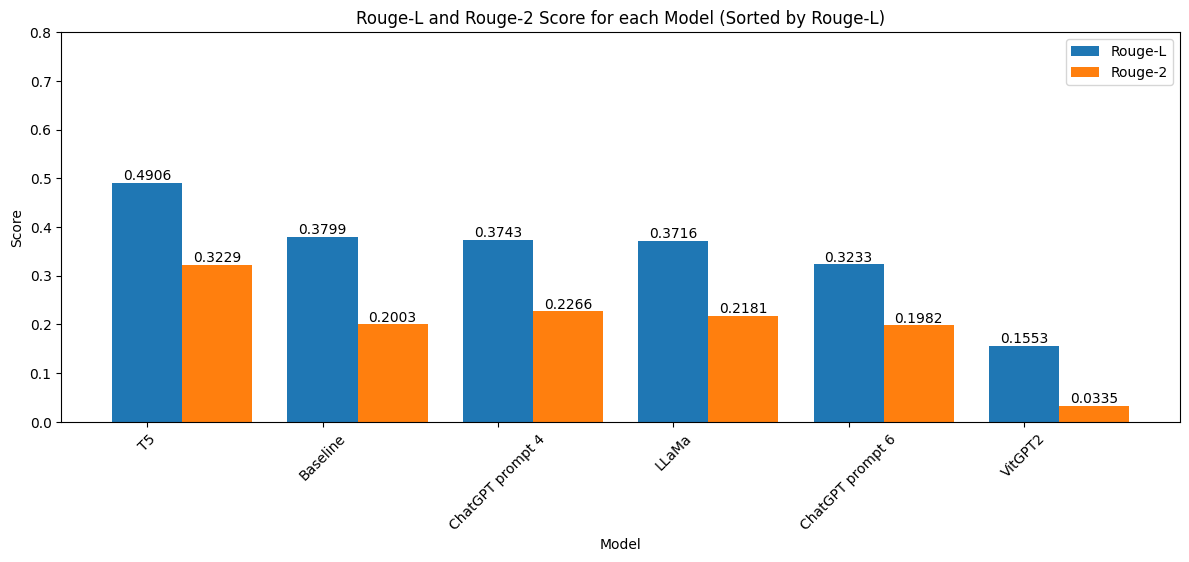

In [105]:
model_names = []
rouge_ls = []
rouge_2s = []

for dir in overall_result_model_paths:
        subfolder_path = os.path.join(folder_path, dir)
        csv_path = os.path.join(subfolder_path, "rouge_scores.csv")

        if os.path.exists(csv_path):
            df = pd.read_csv(csv_path)
            rouge_ls.append( df[df['rouge_keys'] == "rougeL_fmeasure"]['scores'].iloc[0])
            rouge_2s.append(df[df['rouge_keys'] == "rouge2_fmeasure"]['scores'].iloc[0])

sort_indices = np.argsort(rouge_ls)[::-1]
sorted_model_names = [overall_result_model_names[i] for i in sort_indices]
sorted_rouge_ls = [rouge_ls[i] for i in sort_indices]
sorted_rouge_2s = [rouge_2s[i] for i in sort_indices]

bar_width = 0.4
index = np.arange(len(sorted_model_names))

# Plotting the bar chart
plt.figure(figsize=(12,6))
plt.bar(index, sorted_rouge_ls, bar_width, label="Rouge-L")
plt.bar(index + bar_width, sorted_rouge_2s, bar_width, label="Rouge-2")
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Rouge-L and Rouge-2 Score for each Model (Sorted by Rouge-L)")
plt.xticks(index, sorted_model_names, rotation=90)
# Add numerical values to each bar
for i, v in enumerate(sorted_rouge_ls):
    plt.text(i, v, str(round(v, 4)), ha="center", va="bottom")

for i, v in enumerate(sorted_rouge_2s):
    plt.text(i + bar_width, v, str(round(v, 4)), ha="center", va="bottom")


plt.ylim(0, 0.8)

plt.tight_layout()
plt.legend()
plt.xticks(rotation=45)
plt.savefig("plots/overall_rouge_scores_f1_barplot.png", dpi=150)
plt.show()

../../eval_results/T5-final-l/cosine_sim.csv
../../eval_results/baseline/cosine_sim.csv
../../eval_results/T5-master/cosine_sim.csv
../../eval_results/T5-final/cosine_sim.csv
../../eval_results/llama-7-master/cosine_sim.csv
../../eval_results/T5-gold/cosine_sim.csv
../../eval_results/T5-gold/cosine_sim.csv
../../eval_results/T5-master-l/cosine_sim.csv
../../eval_results/vit-gpt2/224x224-vit-gpt-2-goldstandard-v2-only/cosine_sim.csv
../../eval_results/vit-gpt2/224x224-vit-gpt-2-goldstandard-v2-only/cosine_sim.csv
../../eval_results/vit-gpt2/384x683-vit-gpt-2-goldstandard-v2/cosine_sim.csv
../../eval_results/vit-gpt2/384x683-vit-gpt-2-goldstandard-v2/cosine_sim.csv
../../eval_results/vit-gpt2/224x224-synthetic-and-goldstandard-v2/cosine_sim.csv
../../eval_results/vit-gpt2/224x224-synthetic-and-goldstandard-v2/cosine_sim.csv
../../eval_results/vit-gpt2/224x224-vit-gpt2-goldstandard-v1/cosine_sim.csv
../../eval_results/vit-gpt2/224x224-vit-gpt2-goldstandard-v1/cosine_sim.csv
../../eval_res

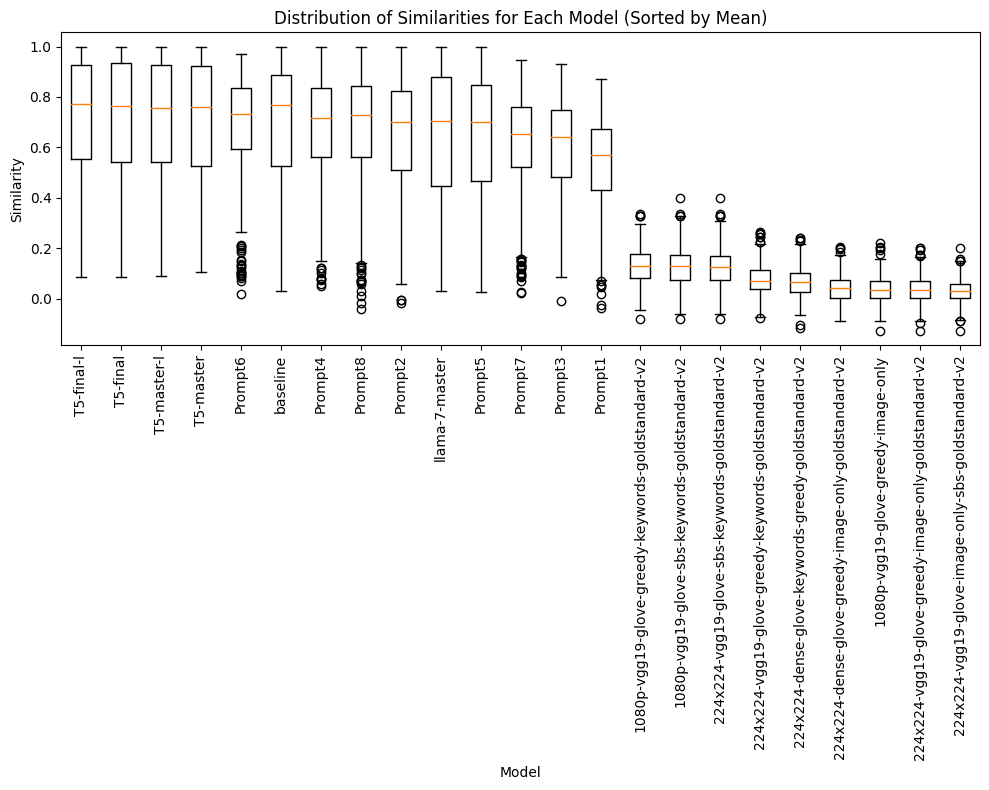

In [56]:
# Initialize a list to store the similarity data for each model
similarity_data = []
model_names = []
# Iterate through the subfolders in the main folder
for root, dirs, files in os.walk(folder_path):
    for dir_name in dirs:
        subfolder_path = os.path.join(root, dir_name)
        csv_path = os.path.join(subfolder_path, "cosine_sim.csv")

        # Check if the cosine_sim.csv file exists in the subfolder
        if os.path.exists(csv_path):
            df = pd.read_csv(csv_path)

            print(csv_path)
            try:
             similarity_data.append(df['max_similarity'])
             model_names.append(dir_name)
            except:
                print(csv_path)

mean_similarities = [np.mean(data) for data in similarity_data]

# Sort the data and mean similarities in descending order
sort_indices = np.argsort(mean_similarities)[::-1]
sorted_similarity_data = [similarity_data[i] for i in sort_indices]
sorted_model_names = [model_names[i] for i in sort_indices]
sorted_mean_similarities = [mean_similarities[i] for i in sort_indices]

# Plotting the boxplot
plt.figure(figsize=(10,8))
plt.boxplot(sorted_similarity_data, labels=sorted_model_names)
plt.xlabel("Model")
plt.ylabel("Similarity")
plt.title("Distribution of Similarities for Each Model (Sorted by Mean)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("plots/cosine_sim_boxplot.png", dpi=150)
plt.show()

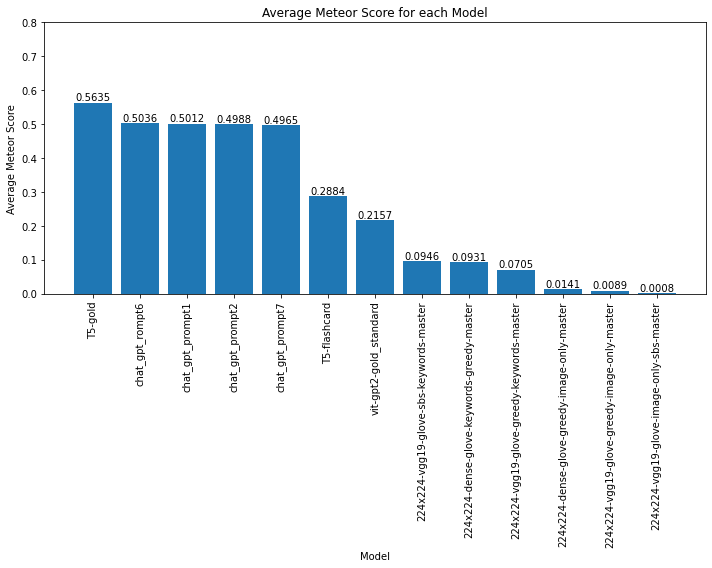

In [8]:
model_names = []
average_similarities = []

# Iterate through the subfolders in the main folder
for root, dirs, files in os.walk(folder_path):
    for dir_name in dirs:
        subfolder_path = os.path.join(root, dir_name)
        csv_path = os.path.join(subfolder_path, "sem_meteor.csv")

        if os.path.exists(csv_path):
            df = pd.read_csv(csv_path)
            average_similarity = df['sem_meteor'].mean()
            model_names.append(dir_name)
            average_similarities.append(average_similarity)

sort_indices = np.argsort(average_similarities)[::-1]
sorted_model_names = [model_names[i] for i in sort_indices]
sorted_average_similarities = [average_similarities[i] for i in sort_indices]

# Plotting the bar chart
plt.figure(figsize=(10,8))
plt.bar(sorted_model_names, sorted_average_similarities)
plt.xlabel("Model")
plt.ylabel("Average Meteor Score")
plt.title("Average Meteor Score for each Model")
plt.xticks(rotation=90)
# Add numerical values to each bar
for i, v in enumerate(sorted_average_similarities):
    plt.text(i, v, str(round(v, 4)), ha="center", va="bottom")

plt.ylim(0, 0.8)

plt.tight_layout()
plt.savefig("plots/meteor_barplot.png", dpi=150)
plt.show()

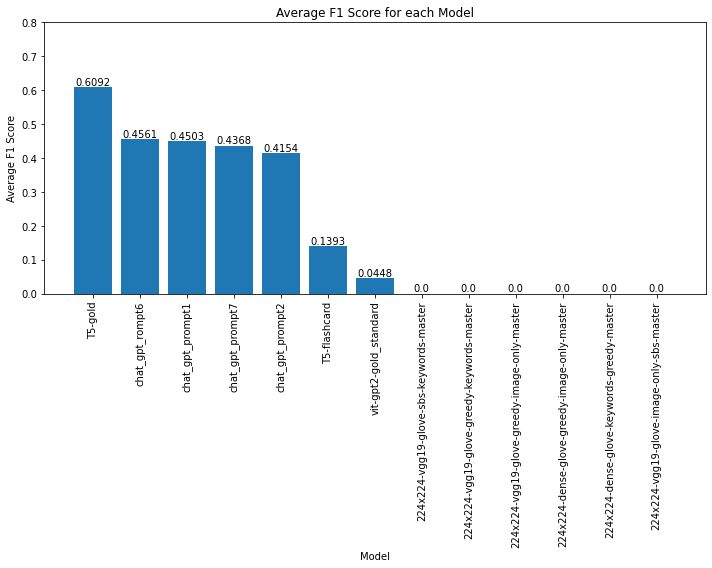

In [9]:
model_names = []
average_similarities = []

# Iterate through the subfolders in the main folder
for root, dirs, files in os.walk(folder_path):
    for dir_name in dirs:
        subfolder_path = os.path.join(root, dir_name)
        csv_path = os.path.join(subfolder_path, "traditional_scores.csv")

        if os.path.exists(csv_path):
            df = pd.read_csv(csv_path)
            average_similarity = df['f1'].mean()
            model_names.append(dir_name)
            average_similarities.append(average_similarity)

sort_indices = np.argsort(average_similarities)[::-1]
sorted_model_names = [model_names[i] for i in sort_indices]
sorted_average_similarities = [average_similarities[i] for i in sort_indices]

# Plotting the bar chart
plt.figure(figsize=(10,8))
plt.bar(sorted_model_names, sorted_average_similarities)
plt.xlabel("Model")
plt.ylabel("Average F1 Score")
plt.title("Average F1 Score for each Model")
plt.xticks(rotation=90)
# Add numerical values to each bar
for i, v in enumerate(sorted_average_similarities):
    plt.text(i, v, str(round(v, 4)), ha="center", va="bottom")

plt.ylim(0, 0.8)

plt.tight_layout()
plt.savefig("plots/traditional_scores_f1_barplot.png", dpi=150)
plt.show()

# Extract classifier result plots

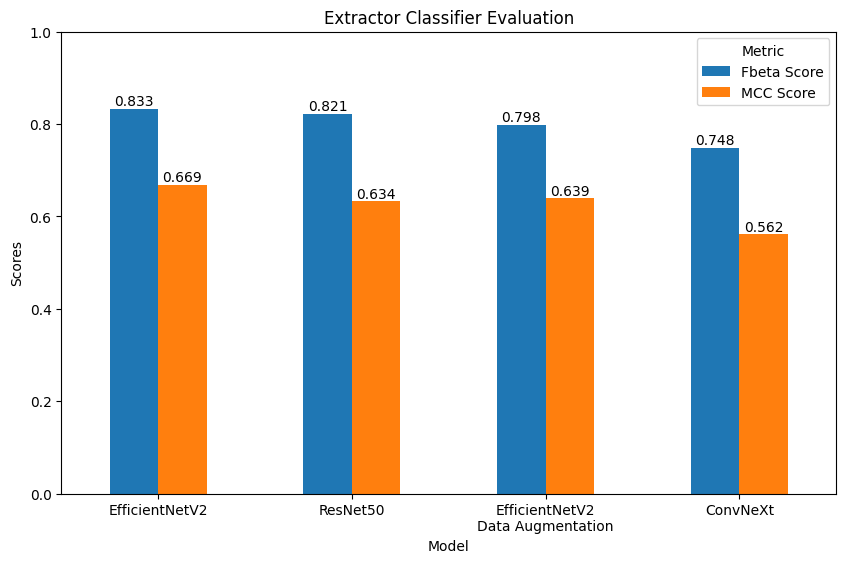

In [40]:
# Extract classifier result plots
model_names = ["ResNet50", "EfficientNetV2", "ConvNeXt", "EfficientNetV2\nData Augmentation"]
fbeta_scores = [0.8206, 0.8326, 0.7484, 0.7979]
mcc_scores = [0.6339, 0.6688, 0.5617, 0.6387]

data = {
    'Model': model_names,
    'Fbeta Score': fbeta_scores,
    'MCC Score': mcc_scores
}

df = pd.DataFrame(data)
df = df.sort_values(by='Fbeta Score', ascending=False)

ax = df.plot(x='Model', kind='bar', rot=0, figsize=(10, 6))
ax.set_ylabel('Scores')
ax.set_title('Extractor Classifier Evaluation')
plt.legend(title='Metric')
plt.ylim(0, 1)

fbeta_sorted = df["Fbeta Score"].tolist()
mcc_sorted = df["MCC Score"].tolist()
score_list = fbeta_sorted + mcc_sorted
for idx, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + height*.01,
            str(round(score_list[idx], 3)),
            ha="center")

plt.savefig("plots/extractor_classifier_results.png", dpi=150)
plt.show()